# Task 3.2
Development of a classification model for discriminating between 4 classes: masses and calcification. Usage of at least one pre-trained state-of-the-art architecture.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import os
from google.colab import drive
import numpy as np

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
drive.mount('/content/drive')
os.listdir()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [0]:
base_dir = 'drive/My Drive/Computational Intelligence - MY PROJECT/My_Project_CompInt' 
os.listdir(base_dir)

['OldNotebooks',
 'Task 1',
 'Models',
 'Task4_RelevantPapers',
 'Task 3.1_ INCEPTIONV3.ipynb',
 'Tensors',
 'Task3.2_INCEPTION.ipynb',
 'Task2.1_With Data Aug.ipynb',
 'Task4.ipynb',
 'Task3.1_VGG16.ipynb',
 'Task5.ipynb',
 'Task3.2_VGG16.ipynb',
 'Task2.2.ipynb']

In [0]:
#Restore the saved model
model = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task2.1_BaseVersion.h5'))

# Show the model architecture
model.summary()

# Getting the Data 

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images, train_labels, test_images, test_lable = load_training()




## Reshape

In [0]:
# reshape per poter fittare la CNN
# the input shape has to be (224, 224, 3)
train_images = train_images.reshape((5352, 150, 150,1))
train_images = train_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([5352,150, 150, 1])
b = train_images
c = tf.concat([train_images, b], axis=3)
RGB_train_images_toResize = tf.concat([c, b], axis=3)
RGB_train_images = tf.image.resize(RGB_train_images_toResize, ( 224, 224))
print(RGB_train_images.shape)



test_images = test_images.reshape((672, 150, 150,1))
test_images = test_images.astype('float32') / 65535

#adding channels
#b = tf.zeros([672,150, 150, 1])
b = test_images
c = tf.concat([test_images, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images = tf.image.resize(RGB_test_images_toResize, ( 224, 224))
print(RGB_test_images[0])




(5352, 224, 224, 3)
tf.Tensor(
[[[0.6327001  0.6327001  0.6327001 ]
  [0.6335083  0.6335083  0.6335083 ]
  [0.6339117  0.6339117  0.6339117 ]
  ...
  [0.55990124 0.55990124 0.55990124]
  [0.5532587  0.5532587  0.5532587 ]
  [0.5458152  0.5458152  0.5458152 ]]

 [[0.6299443  0.6299443  0.6299443 ]
  [0.63050795 0.63050795 0.63050795]
  [0.6314323  0.6314323  0.6314323 ]
  ...
  [0.5550303  0.5550303  0.5550303 ]
  [0.5482422  0.5482422  0.5482422 ]
  [0.5409657  0.5409657  0.5409657 ]]

 [[0.62790954 0.62790954 0.62790954]
  [0.6282891  0.6282891  0.6282891 ]
  [0.6298383  0.6298383  0.6298383 ]
  ...
  [0.5495275  0.5495275  0.5495275 ]
  [0.54317033 0.54317033 0.54317033]
  [0.53659254 0.53659254 0.53659254]]

 ...

 [[0.6717546  0.6717546  0.6717546 ]
  [0.67226046 0.67226046 0.67226046]
  [0.672349   0.672349   0.672349  ]
  ...
  [0.55948263 0.55948263 0.55948263]
  [0.55710447 0.55710447 0.55710447]
  [0.55463    0.55463    0.55463   ]]

 [[0.6705272  0.6705272  0.6705272 ]
  [0.6

In [0]:
print(RGB_test_images[1])
print(train_labels[0:100])

In [0]:
#Some check on size

#print("train_image[0]", train_images[3])


print("train_images shape:",RGB_train_images.shape)#just for check
print("train_images dim:",RGB_train_images.ndim)
print("train_images[0] shape:",RGB_train_images[0].shape)#just for check
print("train_images[0] dim:",RGB_train_images[0].ndim)
print("train_images dtype:",RGB_train_images.dtype)

print("lables:")



print("train_labels shape:",train_labels.shape)#just for check
print("train_labels dim:",train_labels.ndim)
print("train_labels[0] shape:",train_labels[0].shape)#just for check
print("train_labels[0] dim:",train_labels[0].ndim)
print("train_labels dtype:",train_labels.dtype)
print("train_labels[0]", train_labels[1])



train_images shape: (5352, 224, 224, 3)
train_images dim: 4
train_images[0] shape: (224, 224, 3)
train_images[0] dim: 3
train_images dtype: <dtype: 'float32'>
lables:
train_labels shape: (5352,)
train_labels dim: 1
train_labels[0] shape: ()
train_labels[0] dim: 0
train_labels dtype: int64
train_labels[0] 2


##DATASet manipulation
In order to perform binary classification some manipulations must be done 

In [0]:
print(RGB_train_images[0:2])

Tensor("strided_slice_3:0", shape=(2, 224, 224, 3), dtype=float32)


## Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray =  np.empty_like(RGB_train_images)
SubTrainArray =  np.delete(RGB_train_images, np.s_[::2], 0)

SubLabelArray = np.empty_like(train_labels)
SubLabelArray =  np.delete(train_labels, np.s_[::2], 0)


In [0]:
print(SubLabelArray[0:1000])
print(SubLabelArray[1000:2000])
print(SubTrainArray.shape)


## Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray)
SubLabelArray_Cat = np.empty_like(SubLabelArray)

for i in range(leng):
    if SubLabelArray[i] == 1:
      SubLabelArray_Cat[i] = 0
    if SubLabelArray[i] == 2:
      SubLabelArray_Cat[i] = 1
    if SubLabelArray[i] == 3:
      SubLabelArray_Cat[i] = 2
    if SubLabelArray[i] == 4:
      SubLabelArray_Cat[i] = 3

print(SubLabelArray_Cat[0:1000])
print(SubLabelArray_Cat[2000:])


[1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 

## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray =  np.empty_like(RGB_test_images)
SubTestArray =  np.delete(RGB_test_images, np.s_[::2], 0)

SubTestLabelArray = np.empty_like(test_lable)
SubTestLabelArray =  np.delete(test_lable, np.s_[::2], 0)
print(SubTestLabelArray[0:1000])
print(SubTestArray.shape)

[2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 4 3 3 3 3
 3 3 4 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 4 4 4
 4 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3]
(336, 224, 224, 3)


### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited = np.zeros_like(SubTestLabelArray)

leng = len(SubTestLabelArray)
for i in range(leng):
    if SubTestLabelArray[i] == 1:
      SubTestLabelArray_Edited[i] = 0
    if SubTestLabelArray[i] == 2:
      SubTestLabelArray_Edited[i] = 1
    if SubTestLabelArray[i] == 3:
      SubTestLabelArray_Edited[i] = 2
    if SubTestLabelArray[i] == 4:
      SubTestLabelArray_Edited[i] = 3

print(SubTestLabelArray_Edited[0:1000])


[1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 3 2 2 2 2
 2 2 3 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3
 3 2 2 2 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 3 3 2 2 2 2 3 2 2 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2]


## To Categorical for both test and train

In [0]:

from keras.utils import to_categorical

SubTestLabelArray_Categorical = to_categorical(SubTestLabelArray_Edited,4)#test
SubTrainLabelArray_Categorical = to_categorical(SubLabelArray_Cat,4)#train
print(SubTrainLabelArray_Categorical)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Using TensorFlow backend.


## Shuffle for Train Data

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled, SubLabelArray_Shuffled = shuffle( SubTrainArray, SubTrainLabelArray_Categorical, random_state=42)



In [0]:
#Printing in order to check if the shuffled has been performed well
print(SubLabelArray_Shuffled[0:1000])
print(SubLabelArray_Shuffled[2000:3000])


# First Version: Using VGG 16 without Data Augmentation

## Importing VGG


In [0]:
from tensorflow.keras.applications import VGG16

conv_VGG = VGG16(weights='imagenet',
                  include_top=False, #We do not need the classifier of IMAGENET competition
                  input_shape=(224, 224, 3))# Potrei usare anche 150x150 ma la rete è stata pensata per immagini a 224x224


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
conv_VGG.summary()

## Freezing the VGG layers


In [0]:
conv_VGG.trainable = False

## Training my layers with VGG16 freezed: Dropout VERSION



#### Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_DropOut = models.Sequential()

model_DropOut.add(conv_VGG)
model_DropOut.add(layers.Flatten())
model_DropOut.add(layers.Dense(512, activation='relu'))
model_DropOut.add(layers.Dense(256, activation='relu'))
model_DropOut.add(layers.Dense(4, activation='softmax'))



In [0]:
model_DropOut.summary()#a summary of the architecture

In [0]:

model_DropOut.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=6)

### Guardo quanti layer sono effettivamente trainabili.
 Avendo congelato la rete VGG16, solo i miei layer aggiunti sono trainabili. 

In [0]:
print('This is the number of trainable weights ', len(model_DropOut.trainable_weights))

This is the number of trainable weights  6


### 10 - CrossValidation
10 has been choosen following the paper "Deep Learning for Breast Cancer Diagnosis from
Mammograms—A Comparative Study"

This is the number of trainable weights  6
processing fold # 0
Train on 2409 samples, validate on 267 samples
Epoch 1/50
2409/2409 [==============================] - 15s 6ms/sample - loss: 1.5095 - categorical_accuracy: 0.3765 - val_loss: 1.3005 - val_categorical_accuracy: 0.3858
Epoch 2/50
2409/2409 [==============================] - 7s 3ms/sample - loss: 1.1198 - categorical_accuracy: 0.4940 - val_loss: 1.2200 - val_categorical_accuracy: 0.4719
Epoch 3/50
2409/2409 [==============================] - 7s 3ms/sample - loss: 1.0769 - categorical_accuracy: 0.5222 - val_loss: 1.3259 - val_categorical_accuracy: 0.4345
Epoch 4/50
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.9984 - categorical_accuracy: 0.5384 - val_loss: 1.1458 - val_categorical_accuracy: 0.4607
Epoch 5/50
2409/2409 [==============================] - 7s 3ms/sample - loss: 0.9454 - categorical_accuracy: 0.5650 - val_loss: 0.9730 - val_categorical_accuracy: 0.5918
Epoch 6/50
2409/2409 [=================

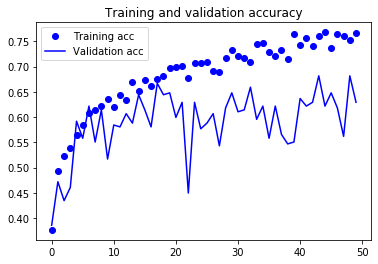

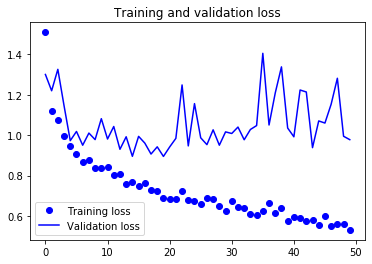

processing fold # 1
Train on 2409 samples, validate on 267 samples
Epoch 1/50
1632/2409 [===================>..........] - ETA: 2s - loss: 1.6785 - categorical_accuracy: 0.3631

KeyboardInterrupt: ignored

In [0]:
#cross-validation, SUL TRAINING ESTRATTO e shuffled
import numpy as np
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

def get_model():
  Cross_model_DropOut = models.Sequential()

  Cross_model_DropOut.add(conv_VGG)
  Cross_model_DropOut.add(layers.Flatten())
  Cross_model_DropOut.add(layers.Dense(512, activation='relu'))
  Cross_model_DropOut.add(layers.Dense(256, activation='relu'))
  Cross_model_DropOut.add(layers.Dense(4, activation='softmax'))
  return Cross_model_DropOut

def plot():
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  return



k = 10
num_val_samples = len(SubTrainArray_Shuffled) // k
num_epochs = 50
Cross_model_DropOut = get_model()
Cross_model_DropOut.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print('This is the number of trainable weights ', len(Cross_model_DropOut.trainable_weights))
for i in range(k):
  print('processing fold #', i)
  
  val_data = SubTrainArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = SubLabelArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([SubTrainArray_Shuffled[:i * num_val_samples],SubTrainArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([SubLabelArray_Shuffled[:i * num_val_samples],SubLabelArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  history = Cross_model_DropOut.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=32)
  Cross_model_DropOut = get_model()
  Cross_model_DropOut.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  plot()



### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model_DropOut.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=50,callbacks=[callback], batch_size=32)


Train on 2676 samples
Epoch 1/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 2.6085 - categorical_accuracy: 0.3102
Epoch 2/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.3545 - categorical_accuracy: 0.3558
Epoch 3/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.2347 - categorical_accuracy: 0.4155
Epoch 4/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.1799 - categorical_accuracy: 0.4570
Epoch 5/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.1331 - categorical_accuracy: 0.4783
Epoch 6/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.0891 - categorical_accuracy: 0.4966
Epoch 7/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.0582 - categorical_accuracy: 0.5116
Epoch 8/50
2676/2676 [==============================] - 7s 3ms/sample - loss: 1.0466 - categorical_accuracy: 0.5194
Epoch 9/50
2676/2676 [============================

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut.evaluate(SubTestArray, SubTestLabelArray_Categorical, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 1s 3ms/sample - loss: 1.4043 - categorical_accuracy: 0.5952
1.404349644978841
0.5952381


In [0]:
#Sblocco 
set_trainable = False
for layer in model_DropOut.layers:
    if layer.name == 'vgg16':
        set_trainable = False
    if set_trainable:
        layer.trainable = False
  

### Plotting

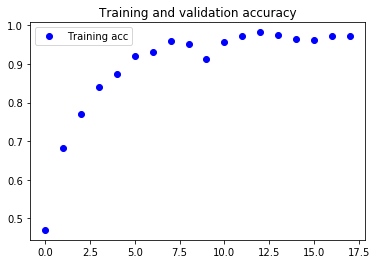

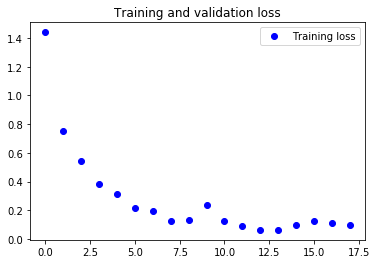

In [0]:
import matplotlib.pyplot as plt
acc = history.history['categorical_accuracy']
#val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## FINE-TUNING: unfreezing VGG16 bottom layers
Considered that the new dataset is small and different from the previous it is not appropriate to finetuning. Neverthless in some paper, as "Deep Learning for Breast Cancer Diagnosis from
Mammograms—A Comparative Study" fine-tuning has been used obtaining good results

Decido quali layer rendere trainabili

In [0]:
conv_VGG.trainable = True

set_trainable = False
for layer in conv_VGG.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in conv_VGG.layers:
    if layer.trainable == True :
        print(layer.name)


block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model_DropOut.trainable_weights))

This is the number of trainable weights  18


### Re-compile the model with a low LR

In [0]:
model_DropOut.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)


### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model_DropOut.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=30,callbacks=[callback], batch_size=32)


Train on 2676 samples
Epoch 1/30
2676/2676 [==============================] - 11s 4ms/sample - loss: 0.6425 - categorical_accuracy: 0.7201
Epoch 2/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.6212 - categorical_accuracy: 0.7257
Epoch 3/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.6155 - categorical_accuracy: 0.7377
Epoch 4/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.6055 - categorical_accuracy: 0.7407
Epoch 5/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.5956 - categorical_accuracy: 0.7410
Epoch 6/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.5896 - categorical_accuracy: 0.7522
Epoch 7/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.5851 - categorical_accuracy: 0.7545
Epoch 8/30
2676/2676 [==============================] - 10s 4ms/sample - loss: 0.5780 - categorical_accuracy: 0.7556
Epoch 9/30
2676/2676 [====================

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_DropOut.evaluate(SubTestArray, SubTestLabelArray_Categorical, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 1s 2ms/sample - loss: 1.4043 - categorical_accuracy: 0.5952
1.404349644978841
0.5952381


### Load OR Save the model

In [0]:
#Save the model!
model_DropOut.save(os.path.join(base_dir,'Models/Model_Task_3.2_VGG16_justFitting_224x224_0.61.h5'))

In [0]:
#Restore the saved model
model_DropOut = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithDROPOUT_Definitivo_0.8.h5'))

# Show the model architecture
model_DropOut.summary()

# VGG16 with augmentation: Same steps but Adding Data Augmentation

## Importing VGG


In [0]:
from tensorflow.keras.applications import VGG16

conv_VGG = VGG16(weights='imagenet',
                  include_top=False, #We do not need the classifier of IMAGENET competition
                  input_shape=(224, 224, 3))# Potrei usare anche 150x150 ma la rete è stata pensata per immagini a 224x224


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
conv_VGG.summary()

## Freezing the VGG layers


In [0]:
conv_VGG.trainable = False

## Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_Augmented = models.Sequential()

model_Augmented.add(conv_VGG)
model_Augmented.add(layers.Flatten())
model_Augmented.add(layers.Dense(512, activation='relu'))
model_Augmented.add(layers.Dense(256, activation='relu'))
model_Augmented.add(layers.Dense(4, activation='softmax'))



In [0]:
model_Augmented.summary()#a summary of the architecture

In [0]:

model_Augmented.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)

## Guardo quanti layer sono effettivamente trainabili.
 Avendo congelato la rete VGG16, solo i miei layer aggiunti sono trainabili. 

In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  6


## Modifying of the dataset

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images_Augmented, train_labels_Augmented, test_images_Augmented, test_lable_Augmented = load_training()





In [0]:
#reshape per poter fittare la CNN


train_images_Augmented = train_images_Augmented.reshape((5352, 150, 150,1))
#adding channels in TRAINING
b = train_images_Augmented
c = tf.concat([train_images_Augmented, b], axis=3)
RGB_train_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_train_images_Augmented = tf.image.resize(RGB_train_images_Augmented_toResize, ( 224, 224))
print(RGB_train_images_Augmented[0])



test_images_Augmented = test_images_Augmented.reshape((672, 150, 150,1))
#adding channels in TESTSET
b = test_images_Augmented
c = tf.concat([test_images_Augmented, b], axis=3)
RGB_test_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_test_images_Augmented = tf.image.resize(RGB_test_images_Augmented_toResize, ( 224, 224))
print(RGB_test_images_Augmented[0])

tf.Tensor(
[[[40798.    40798.    40798.   ]
  [41420.004 41420.004 41420.004]
  [41843.137 41843.137 41843.137]
  ...
  [43107.402 43107.402 43107.402]
  [42883.31  42883.31  42883.31 ]
  [42339.    42339.    42339.   ]]

 [[40231.49  40231.49  40231.49 ]
  [40724.47  40724.47  40724.47 ]
  [41065.39  41065.39  41065.39 ]
  ...
  [42034.83  42034.83  42034.83 ]
  [42259.875 42259.875 42259.875]
  [42505.473 42505.473 42505.473]]

 [[39586.727 39586.727 39586.727]
  [39798.387 39798.387 39798.387]
  [39955.39  39955.39  39955.39 ]
  ...
  [41166.875 41166.875 41166.875]
  [41750.93  41750.93  41750.93 ]
  [42561.75  42561.75  42561.75 ]]

 ...

 [[41119.82  41119.82  41119.82 ]
  [41247.746 41247.746 41247.746]
  [41525.535 41525.535 41525.535]
  ...
  [43925.67  43925.67  43925.67 ]
  [44051.938 44051.938 44051.938]
  [44128.68  44128.68  44128.68 ]]

 [[41540.613 41540.613 41540.613]
  [41574.305 41574.305 41574.305]
  [41698.574 41698.574 41698.574]
  ...
  [43739.2   43739.2   4373

### Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray_AG =  np.empty_like(RGB_train_images_Augmented)
SubTrainArray_AG  =  np.delete(RGB_train_images_Augmented, np.s_[::2], 0)
print(SubTrainArray_AG[1])
SubLabelArray_AG  = np.empty_like(train_labels_Augmented)
SubLabelArray_AG  =  np.delete(train_labels_Augmented, np.s_[::2], 0)
print(SubLabelArray_AG[0:100])


[[[38970.    38970.    38970.   ]
  [38359.094 38359.094 38359.094]
  [37690.055 37690.055 37690.055]
  ...
  [37709.11  37709.11  37709.11 ]
  [38011.023 38011.023 38011.023]
  [38178.    38178.    38178.   ]]

 [[38492.777 38492.777 38492.777]
  [38268.434 38268.434 38268.434]
  [37919.12  37919.12  37919.12 ]
  ...
  [38302.227 38302.227 38302.227]
  [38456.    38456.    38456.   ]
  [38533.145 38533.145 38533.145]]

 [[38292.3   38292.3   38292.3  ]
  [38403.23  38403.23  38403.23 ]
  [38343.01  38343.01  38343.01 ]
  ...
  [38978.797 38978.797 38978.797]
  [39002.18  39002.18  39002.18 ]
  [39020.066 39020.066 39020.066]]

 ...

 [[33344.414 33344.414 33344.414]
  [33025.402 33025.402 33025.402]
  [32863.633 32863.633 32863.633]
  ...
  [35349.12  35349.12  35349.12 ]
  [34783.047 34783.047 34783.047]
  [33940.84  33940.84  33940.84 ]]

 [[33051.035 33051.035 33051.035]
  [32954.723 32954.723 32954.723]
  [32982.758 32982.758 32982.758]
  ...
  [34999.13  34999.13  34999.13 ]
  [3

### Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray_AG)
SubLabelArray_Categorical_AG = np.empty_like(SubLabelArray_AG)

for i in range(leng):
    if SubLabelArray_AG[i] == 1:
      SubLabelArray_Categorical_AG[i] = 0
    if SubLabelArray_AG[i] == 2:
      SubLabelArray_Categorical_AG[i] = 1
    if SubLabelArray_AG[i] == 3:
      SubLabelArray_Categorical_AG[i] = 2
    if SubLabelArray_AG[i] == 4:
      SubLabelArray_Categorical_AG[i] = 3



print(SubLabelArray_Categorical_AG[0:1000])
print(SubLabelArray_Categorical_AG[2000:])


## Modifiyng the testset

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray_Augmented =  np.empty_like(RGB_test_images_Augmented)
SubTestArray_Augmented =  np.delete(RGB_test_images_Augmented, np.s_[::2], 0)

SubTestLabelArray_Augmented = np.empty_like(test_lable_Augmented)
SubTestLabelArray_Augmented =  np.delete(test_lable_Augmented, np.s_[::2], 0)
print(SubTestArray_Augmented[0])

### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited_Augmented = np.zeros_like(SubTestLabelArray_Augmented)

leng = len(SubTestLabelArray_Augmented)

for i in range(leng):
    if SubTestLabelArray_Augmented[i] == 1:
      SubTestLabelArray_Edited_Augmented[i] = 0
    if SubTestLabelArray_Augmented[i] == 2:
      SubTestLabelArray_Edited_Augmented[i] = 1
    if SubTestLabelArray_Augmented[i] == 3:
      SubTestLabelArray_Edited_Augmented[i] = 2
    if SubTestLabelArray_Augmented[i] == 4:
      SubTestLabelArray_Edited_Augmented[i] = 3




print(SubTestLabelArray_Edited_Augmented[0:1000])


[1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 3 2 2 2 2
 2 2 3 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3
 3 2 2 2 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 3 3 2 2 2 2 3 2 2 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2]


## To Categorical for both test and train

In [0]:

from keras.utils import to_categorical

SubTestLabelArray_Categorical_Augmented = to_categorical(SubTestLabelArray_Edited_Augmented,4)#test
SubTrainLabelArray_Categorical_Augmented = to_categorical(SubLabelArray_Categorical_AG,4)#train
print(SubTrainLabelArray_Categorical_Augmented)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Using TensorFlow backend.


## Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG = shuffle( SubTrainArray_AG, SubTrainLabelArray_Categorical_Augmented, random_state=42)



### Freezing the VGG layers


In [0]:
conv_VGG.trainable = False

In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  6


## Data Augmentation

In [0]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


train_datagen = ImageDataGenerator(
      rescale=1./65535,
      rotation_range=360,
      zoom_range=0.1, 
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./65535)
test_datagen = ImageDataGenerator(rescale=1./65535)


In [0]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_targets, val_targets = train_test_split(SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG, test_size=0.1, stratify=SubLabelArray_Shuffled_AG)


In [0]:
print(train_targets)

In [0]:


train_generator = train_datagen.flow(
        # This is the target directory
        train_data,
        train_targets,
        batch_size=32
        )

validation_generator = validation_datagen.flow(
        val_data,
        val_targets,
        batch_size=32)

test_generator = test_datagen.flow(
        SubTestArray_Augmented,
        SubTestLabelArray_Categorical_Augmented,
        batch_size = 32
)


In [0]:
import matplotlib.pyplot as plt

augmented_images = [train_generator[0][0][0] for i in range(5)]
for data_batch, labels_batch in train_generator:
    plt.axis("off")
    plt.imshow(np.squeeze(data_batch[1]),aspect='auto', cmap='Greys')
    plt.show()
    break

## Fitting

In [0]:

history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=268//32)

## Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

  ...
    to  
  ['...']
11/11 [==============================] - 1s 77ms/step - loss: 0.9972 - categorical_accuracy: 0.5327
0.9972431442954324
0.5327381


### Load OR Save the model

In [0]:
#Save the model!
model_DropOut.save(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_WithAugmentatin__0.86.h5'))

In [0]:
#Restore the saved model
model_Augmented = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.2_VGG16_DataAug_AfterFineTune_0.66.h5'))



## FINE-TUNING: unfreezing VGG16 With DataAugmentation
Considered that the new dataset is small and different from the previous it is not appropriate to finetuning. Neverthless in some paper, as "Deep Learning for Breast Cancer Diagnosis from
Mammograms—A Comparative Study" fine-tuning has been used obtaining good results

### Unfreezing

In [0]:
conv_VGG.trainable = True

set_trainable = False
for layer in conv_VGG.layers:
    if layer.name == 'block3_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in conv_VGG.layers:
    if layer.trainable == True :
        print(layer.name)


Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  20


### Re-compile the model with a low LR

In [0]:
model_Augmented.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.000001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=6)


### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
test_acc = 0.6
while test_acc < 0.67:
  history = model_Augmented.fit_generator(
        train_generator,
        steps_per_epoch=2408//32,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=268//32)
  test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)

75/75 [==============================] - 25s 327ms/step - loss: 0.4505 - categorical_accuracy: 0.8093 - val_loss: 0.5748 - val_categorical_accuracy: 0.8086
  ...
    to  
  ['...']
11/11 [==============================] - 1s 74ms/step - loss: 1.1235 - categorical_accuracy: 0.6280
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
75/75 [==============================] - 24s 326ms/step - loss: 0.4366 - categorical_accuracy: 0.8039 - val_loss: 0.5347 - val_categorical_accuracy: 0.8047
  ...
    to  
  ['...']
11/11 [==============================] - 1s 74ms/step - loss: 1.0848 - categorical_accuracy: 0.6339
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
75/75 [==============================] - 24s 321ms/step - loss: 0.4428 - categorical_accuracy: 0.7997 - val_loss: 0.5545 - val_categorical_accuracy: 0.8125
  ...
    to  
  ['...']
11/11 [==============================] - 1s 75ms/step - loss: 1.1089 - cate

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
11/11 [==============================] - 8s 758ms/step - loss: 0.8960 - categorical_accuracy: 0.6607
0.8960218537937511
0.66071427


### Plotting

In [0]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Load OR Save the model

In [0]:
#Save the model!
model_Augmented.save(os.path.join(base_dir,'Models/Model_Task_3.2_VGG16_DataAug_AfterFineTune_0.66.h5'))

In [0]:
#Restore the saved model
model_DropOut = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithDROPOUT_Definitivo_0.8.h5'))

# Show the model architecture
model_DropOut.summary()